# A.2.1 The LBM Code (D1Q2)
## LBM Function
$$f_k\left( x+\Delta x, t+ \Delta t \right) = f_k(x,t)[1-\omega] + \omega f_k^{eq}(x,t)$$
$$f_k^{eq} = w_k \phi(x,t) \left[ 1 + \frac{c_k \vec{u}}{c_s^2} \right]$$
$$\vec{u} = u \mathbf{i} + v \mathbf{j}$$

In [2]:
# LBM for 1-D advection-diffusion

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

m = 100    # m is the number of lattice nodes
f0 = np.zeros(m+1,dtype=float)
f1 = np.zeros(m+1,dtype=float)
f2 = np.zeros(m+1,dtype=float)
rho = np.zeros(m+1,dtype=float)
x = np.zeros(m+1,dtype=float)

u = 0.1
dt = 1.0
dx = 1.0
x[0] = 0.0
for i in range(1,m+1):
    x[i] = x[i-1] + dx
    
ck = dx/dt
csq = ck*ck
alpha = 0.25
omega = 1.0/(alpha/(dt*csq) + 0.5)
mstep = 400    # the total number of time steps
twall = 1.0    # Left hand wall temperature

# main loop
for kk in range(1,mstep+1):
    # collision process:
    for i in range(0,m+1):
        rho[i] = f1[i] + f2[i]
        feq1 = 0.5*rho[i]*(1.0 + u/ck)    # extra term added to simulate advection
        feq2 = 0.5*rho[i]*(1.0 - u/ck)     # w1 = w2 = 0.5，和公式不对应，还不明白为什么
        f1[i] = (1.0 - omega) * f1[i] + omega*feq1
        f2[i] = (1.0 - omega) * f2[i] + omega*feq2
        
    # streaming process:
    for i in range(1,m):
        f1[m-i] = f1[m-i-1]    # f1 streaming
        f2[i-1] = f2[i]    # f2 streaming
        
    # Boundary condition
    f1[0] = twall - f2[0]    # constant temperature boundary condition, x = 0
    f1[m] = f1[m-1]    # adiabatic boundary condition, x = L
    f2[m] = f2[m-1]    # adiabatic boundary condition, x = L
# end of main loop

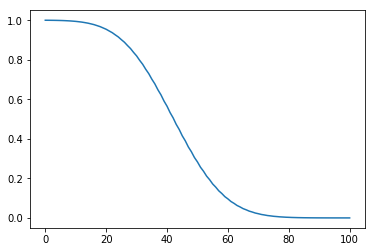

In [4]:
plt.plot(x,rho)

# A.2.2 The FDM Code (1-D)

In [12]:
# Finite difference code for 1-D advection-deffusion problem

n = 200
f0 = np.zeros(n+1,dtype=float)
f = np.zeros(n+1,dtype=float)
x = np.zeros(n+1,dtype=float)

dx = 0.5
dt = 0.25
u = 0.1
alpha = 0.25
mstep = 1600

for i in range(1,n+1):
    x[i] = x[i-1] + dx

f0[0] = 1.0
f[0] = 1.0

for kk in range(1, mstep+1):
    for i in range(1,n):
        adv = dt*u*(f0[i] - f0[i-1])/dx
        f[i] = f0[i] + dt*alpha*(f0[i+1] - 2.0*f0[i] + f0[i-1])/(dx*dx) - adv
        
    for i in range(1,n):
        f0[i] = f[i]

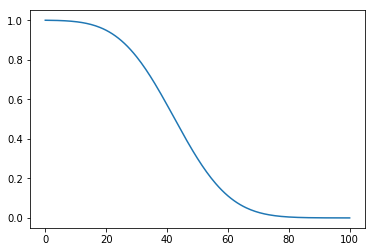

In [13]:
plt.plot(x,f0)